<a href="https://colab.research.google.com/github/MaxCojocari/Py_labs/blob/main/probl4_lab3PSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4. Networking**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re
import json

tweet_json = open('/content/drive/MyDrive/matematica/tweets.json').read()

tweet_dataset = json.loads(tweet_json)

In [ ]:
def clean_text(text):
    #to avoid removing contractions in english
    #temp = re.sub("'", "", text)

    #remove all mentions
    temp = re.sub("@","", text)

    #remove all hashtags
    temp = re.sub("#","", temp)
    
    #remove all links
    temp = re.sub(r'http\S+', '', temp) 
    temp = re.sub(r"www.\S+", "", temp)

    #remove punctuations
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)

    #remove all non-alphanumeric characters
    temp = re.sub("[^a-zA-Z0-9]"," ", temp)

    return temp

# **4.1 Popular**

Write a program that prints the first 10 most frequently used words, and the number
of times it was mentioned.

Ex:

the 352

a 235

at 120

. . .

In [ ]:
def find_words(tweet_dataset, all_words = {}):
    for tweet in tweet_dataset:
        #lowercase all words
        #temp = tweet['text'].lower() 
        
        temp = clean_text(tweet['text'])

        #tokenize string
        temp = temp.split()

        #for each word in string
        for word in temp:

            #if word already exists in dictionary, increment the coresponding value
            if word in all_words:
                all_words[word] += 1
            
            #else append new word in dictionary
            else:
                all_words.update({word: 1})
    
    return all_words

all_words = find_words(tweet_dataset)

In [ ]:
def sort_dict_value(mydict):
    return dict(sorted(mydict.items(), key = lambda x: x[1], reverse = True))

all_words_sorted = sort_dict_value(all_words)

In [ ]:
print("Ten most popular words:")
for i in range(10):
   print(list(all_words_sorted.keys())[i], list(all_words_sorted.values())[i])

Ten most popular words:
the 1205
I 1045
a 891
is 848
to 805
of 669
RT 549
it 542
you 533
in 495


# **4.2 Nouns**

Write a program that prints the first 10 most frequently used nouns, and the number
of times it was mentioned.

In [ ]:
import nltk
#nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

stop_words = set(stopwords.words('english'))

def select_special_nouns(tweet_dataset, noun_taglist, all_nouns):
    for tweet in tweet_dataset:
        
        temp = clean_text(tweet['text'])

        tokenized = sent_tokenize(temp)
        
        for i in tokenized:
            
            # Word tokenizers is used to find the words and punctuation in a string
            wordsList = nltk.word_tokenize(i)
        
            # removing stop words from wordList
            wordsList = [w for w in wordsList if w.lower() not in stop_words] 
        
            # Using a Tagger. Which is part-of-speech tagger or POS-tagger. 
            tagged = nltk.pos_tag(wordsList)

            for pair in tagged:
                if pair[1] in noun_taglist:
                    if pair[0] in all_nouns:
                        all_nouns[pair[0]] += 1
                    else:
                        all_nouns.update({pair[0]: 1})


In [ ]:
noun_taglist = ['NN', 'NNS', 'NNP', 'NNPS']
all_nouns = {}
select_special_nouns(tweet_dataset, noun_taglist, all_nouns)
all_nouns_sorted = sort_dict_value(all_nouns)

In [ ]:
print("Ten most popular nouns:")
for i in range(10):
   print(list(all_nouns_sorted.keys())[i], list(all_nouns_sorted.values())[i])

Ten most popular nouns:
RT 547
time 110
people 89
textfiles 74
work 67
thing 65
Nick 56
Craver 56
year 49
years 48


# **4.3 Proper nouns**

Write a program that prints the first 10 most frequently used **proper nouns**, and the
number of times it was mentioned.

In [ ]:
proper_noun_taglist = ['NNP', 'NNPS']
all_proper_nouns = {}
select_special_nouns(tweet_dataset, proper_noun_taglist, all_proper_nouns)
all_proper_nouns_sorted = sort_dict_value(all_proper_nouns)

In [ ]:
print("Ten most popular proper nouns:")
for i in range(10):
   print(list(all_proper_nouns_sorted.keys())[i], list(all_proper_nouns_sorted.values())[i])

Ten most popular proper nouns:
RT 547
Nick 56
Craver 56
JasonPunyon 39
Apple 32
Beschizza 30
Android 29
Pro 26
Discourse 24
Twitter 24


# **4.4 Frequency**

Write a program that receives a word as an input and draws a frequency bar chart.
Every bar should represent the period of 1 month.

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def find_frequency_of_word(tweet_dataset, words_month_frequency):
    
    for tweet in tweet_dataset:
        #lowercase all words
        temp = tweet['text'].lower() 

        temp = clean_text(temp)

        #tokenize string
        temp = temp.split()

        for word in temp:

            #remove sufixes, prefixes, and reduce to root form (stemming)
            word = ps.stem(word)

            #if word exists in dictionary
            if word in words_month_frequency:

                #and the coresponding date is also in that dictionary of that word
                if tweet['created_at'][0:7] in words_month_frequency[word]:

                    #increment the number
                    words_month_frequency[word][tweet['created_at'][0:7]] += 1
                
                #append new date in that dictionary of that specific word
                else:
                    words_month_frequency[word].update({tweet['created_at'][0:7]: 1})
            
            #append new word and date of tweet publication
            else:
                words_month_frequency.update({word: {tweet['created_at'][0:7]: 1}})



In [ ]:
words_month_frequency = {}
find_frequency_of_word(tweet_dataset, words_month_frequency)
# for key, value in words_month_frequency.items():
#     print("{} {}".format(key, value))

game


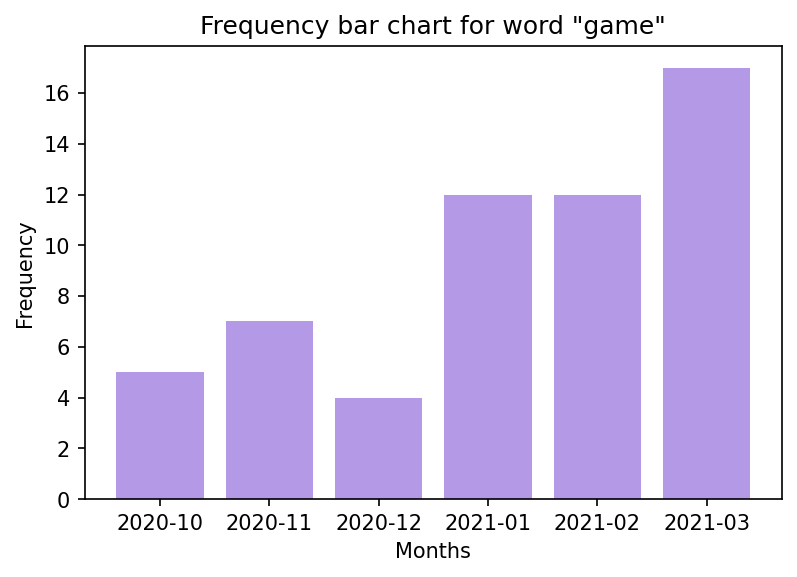

In [ ]:
import matplotlib.pyplot as plt

word = input()

#lowercase the input word
temp = word.lower()

#to avoid removing contractions in english
temp = re.sub("'", "", temp)

#remove all non-alphanumeric characters
temp = re.sub("[^a-z0-9]","", temp)

#reduce to root form
temp = ps.stem(temp)

if temp in words_month_frequency:
    months = [key for key in words_month_frequency[temp].keys()]
    number_of_that_word_month = [value for value in words_month_frequency[temp].values()]
    months.reverse(); number_of_that_word_month.reverse();

    plt.figure(dpi=150)
    plt.bar(months, number_of_that_word_month, color=(0.7, 0.6, 0.9, 1.0))
    plt.title(f'Frequency bar chart for word "{word}"')
    plt.xlabel('Months')
    plt.ylabel('Frequency')
    plt.show()

else:
    print('This word doesn\'t exist in tweets\' texts!')

# **4.5 Popularity**

In our dataset we also have the number of likes and retweets for every message. This can give us some insight about the tweet popularity. Hence we can compute some sort of rating. The popularity of nouns is computed by the following formula frequency * (1.4 + normRetweet) * (1.2 + normLikes). The values normRetweet and normLikes are the normalized values of retweets and likes for every word. To compute the number of likes and retweets for every word you just cumulatively collect the numbers from every tweet that the word was mentioned.

Ex: There are 2 tweets that mention the noun program. First tweet has 32 retweets and 87 likes. The second tweet has 42 retweets and 103 likes. The number of retweets of the word program is 32 + 42 and the number of likes is 87 + 103.

Write a program that prints the first 10 most popular nouns. The popularity is defined by the computed rating discussed above.

In [ ]:
def select_data_noun_popularity(tweet_dataset, noun_taglist, retweet_likes_tweets, all_nouns):
    for tweet in tweet_dataset:
        
        temp = clean_text(tweet['text'])

        tokenized = sent_tokenize(temp)
        
        for i in tokenized:
            
            # Word tokenizers is used to find the words and punctuation in a string
            wordsList = nltk.word_tokenize(i)
        
            # removing stop words from wordList
            wordsList = [w for w in wordsList if w.lower() not in stop_words] 
        
            # Using a Tagger. Which is part-of-speech tagger or POS-tagger. 
            tagged = nltk.pos_tag(wordsList)


            #{word: {retweets: x, likes: y, frequency: z}}        pair = (word, tag)


            for pair in tagged:
                if pair[1] in noun_taglist:
                    if pair[0] in retweet_likes_tweets:
                        retweet_likes_tweets[pair[0]]['retweets'] += tweet['retweets']
                        retweet_likes_tweets[pair[0]]['likes'] += tweet['likes']
                    else:
                        retweet_likes_tweets.update({pair[0]: {'retweets': tweet['retweets'], 'likes': tweet['likes'], 'frequency': all_nouns[pair[0]]}})


In [ ]:
retweet_likes_tweets_dict = {}
select_data_noun_popularity(tweet_dataset, noun_taglist, retweet_likes_tweets_dict, all_nouns)
# for key, value in retweet_likes_tweets_dict.items():
#     print("{} {}".format(key, value))

In [ ]:
popularity_nouns = {}
for key, value in retweet_likes_tweets_dict.items():
    popularity = value['frequency']*(1.4 + value['retweets'])*(1.2 + value['likes'])
    popularity_nouns.update({key: popularity})

In [ ]:
popularity_nouns_sorted = sort_dict_value(popularity_nouns)
print("Ten most popular nouns:")
for i in range(10):
   print(list(popularity_nouns_sorted.keys())[i], list(popularity_nouns_sorted.values())[i])

Ten most popular nouns:
time 73747539720.8
thing 10597205143.199999
people 8966792015.12
years 1896755159.0399997
year 1301841313.92
kids 1113305163.2
work 978190330.56
software 773893157.5999999
way 674238541.6800001
things 649291902.48


# **4.6 Suggestion**

Write a program that receives as input an uncompleted word and prints 3 word suggestions, followed by their frequency. The suggestions should be based on the initial dataset and sorted by the word frequency, computed in the first problem.
The input can be any uncompleted word.


Ex. Input: *app*, Output: *application* (324), *apple* (164), *appreciate* (53). Where *application* has the highest frequency, apple the second highest etc.

Ex. Input: *pro*, Output: *programming* (196), *product* (176), *program* (103). Again *programming* has
the highest frequency.

In [ ]:
uncomplete_word = input()
sugestions = {}
for key in all_words_sorted.keys():
    if key[:len(uncomplete_word)].lower() == uncomplete_word.lower():
        sugestions.update({key: all_words_sorted[key]})

n = len(sugestions)

if n == 0:
    print("We cannot suggest anything :(")
elif n in [1, 2]:
    for i in range(n):
        print(list(sugestions.keys())[i], list(sugestions.values())[i])
else:
    for i in range(3):
        print(list(sugestions.keys())[i], list(sugestions.values())[i])

game
game 37
games 11
Game 5


# **4.7 Suggestion occurrences**

Write a program that receives as input a word and prints 3 word suggestions, followed by the suggestion occurrences.


The suggestions should be selected in the following way. You have to go through your tweets dataset and identify every occurrence of the input word. At every occurrence collect the word that follows the input word. That is the suggestion you
are looking for. And also don't forget to count the number of times you get the same
suggestions. Ex: input like and you find 5 occurrences of beer and 2 occurrences of
love labs. Your suggestion words would be beer and labs. But beer has a priority
because it occurred more times in your dataset. 

Your task is to select the most relevant suggestions as in the one that occurred the most.
The input can be any completed word.

Ex. Input: *love*, Output: *programming* (5), *cars* (2), *beer* (2)

Ex. Input: *awesome*, Output: *party* (10), *language* (4), *framework* (2)

In [ ]:
def suggestion_occurance(word, tweet_dataset):
    suggestions = {}
    for tweet in tweet_dataset:

        temp = tweet['text'].lower()
        
        temp = clean_text(temp)

        tokenized = sent_tokenize(temp)

        for i in tokenized:
            
            # Word tokenizers is used to find the words and punctuation in a string
            wordsList = nltk.word_tokenize(i)

            # removing stop words from wordList
            #wordsList = [w for w in wordsList if w.lower() not in stop_words]

        if word in wordsList and word != wordsList[-1]:
            
            k = wordsList.index(word)
            if wordsList[k+1] in suggestions:
                suggestions[wordsList[k+1]] += 1
            else:
                suggestions.update({wordsList[k+1]: 1})
        
        elif word.lower() in wordsList and word.lower() != wordsList[-1]:
            
            word = word.lower()
            k = wordsList.index(word)
            if wordsList[k+1] in suggestions:
                suggestions[wordsList[k+1]] += 1
            else:
                suggestions.update({wordsList[k+1]: 1})
    
    return sort_dict_value(suggestions)
            


In [ ]:
word = input()
suggestions_by_occurance = suggestion_occurance(word, tweet_dataset)


n = len(suggestions_by_occurance)

if n == 0:
    print("We cannot suggest anything :(")
elif n in [1, 2]:
    for i in range(n):
        print(list(suggestions_by_occurance.keys())[i], list(suggestions_by_occurance.values())[i])
else:
    for i in range(3):
        print(list(suggestions_by_occurance.keys())[i], list(suggestions_by_occurance.values())[i])


love
the 4
you 3
with 2
